### House Price Pridicction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data= pd.read_csv("data_1.csv")

### Data Exploration and Preprocessing

In [3]:
print(data.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [4]:
print(data.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


### data visulization and checkin for null values
#### there are null values in the data

In [6]:
data_1 = data.drop(columns=['No'])

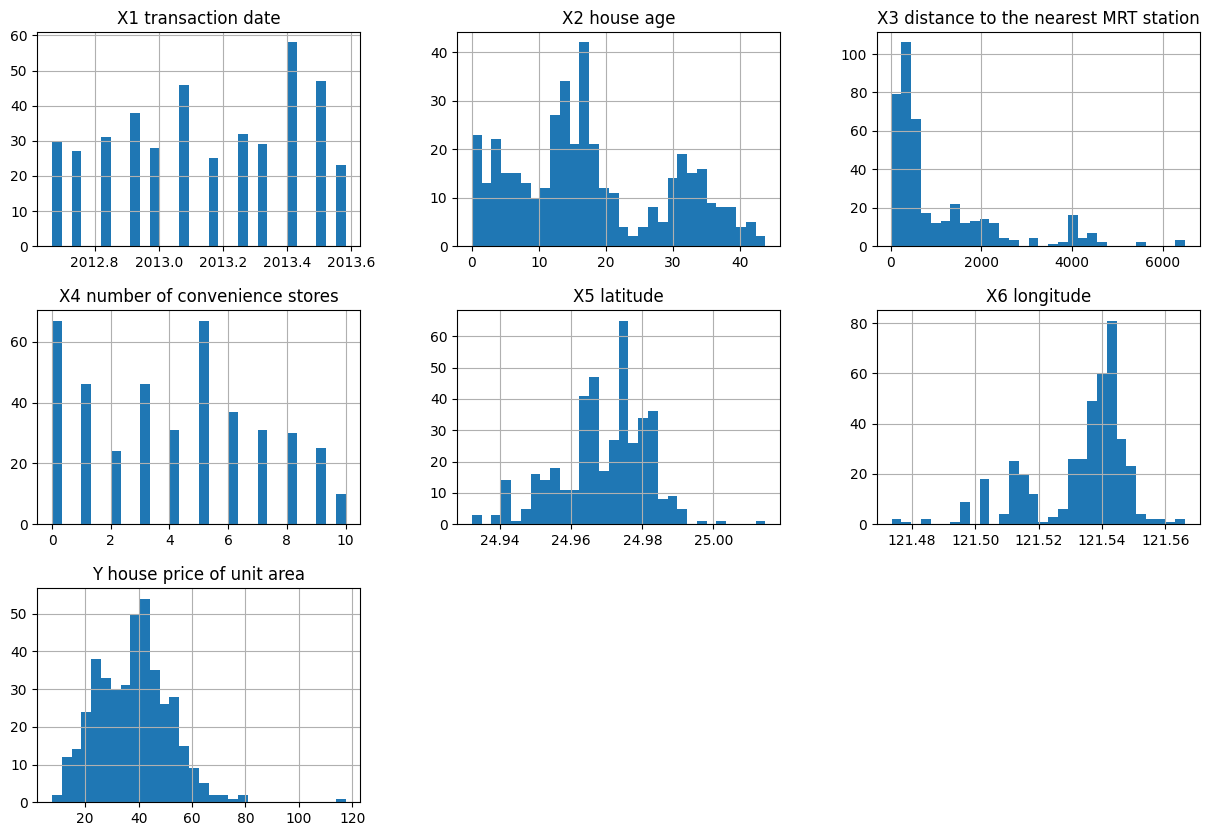

In [7]:
data_1.hist(bins=30, figsize=(15, 10))
plt.show()

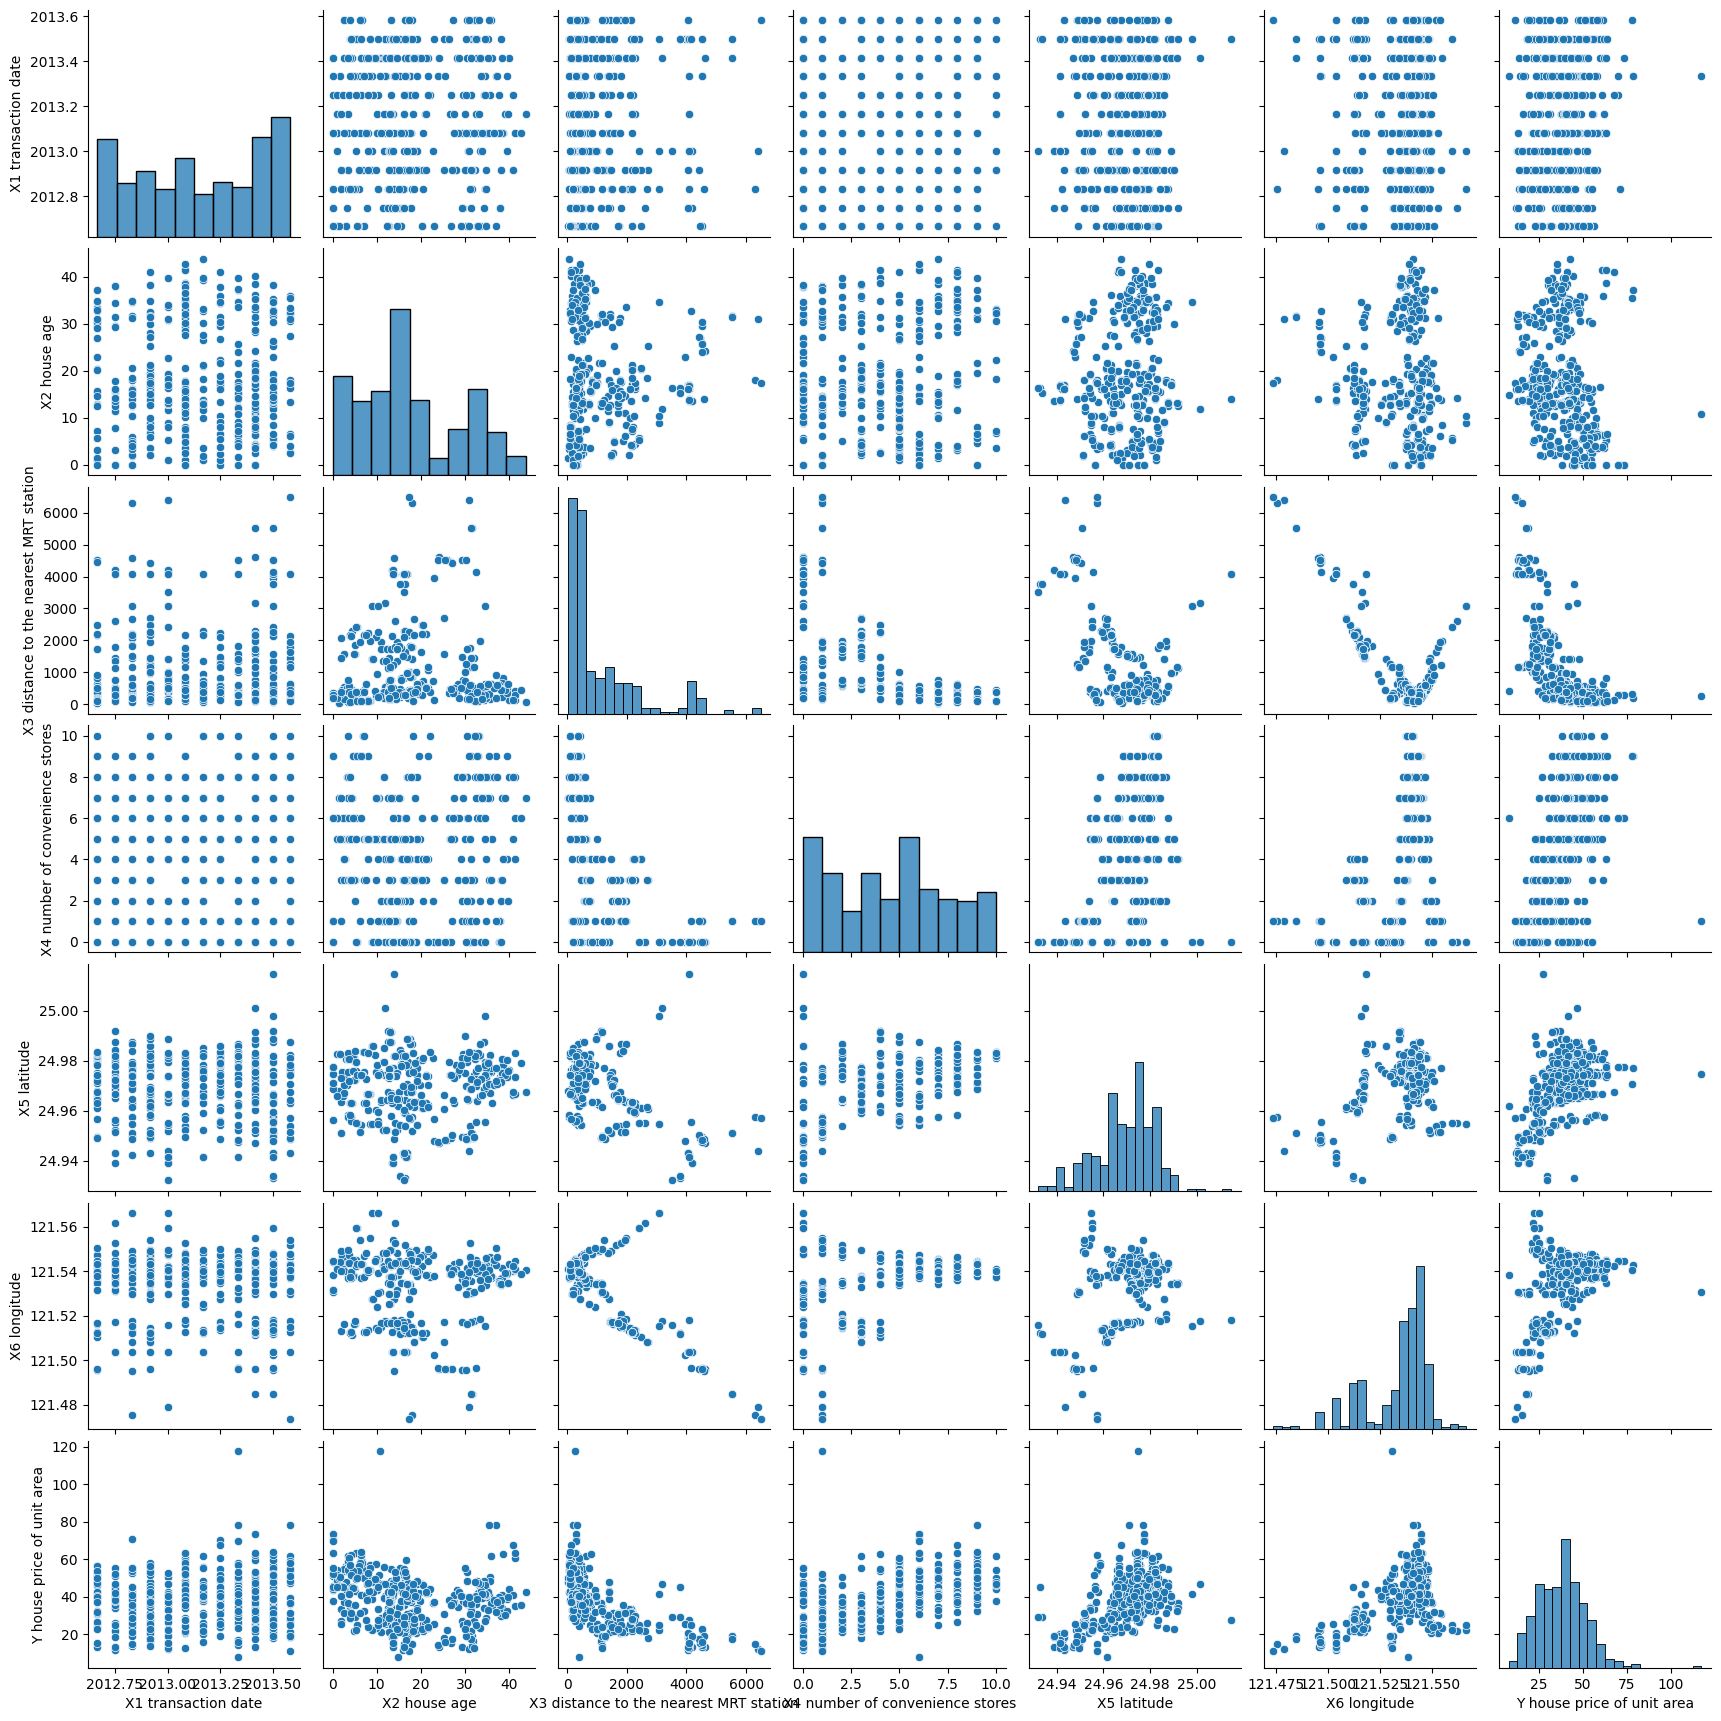

In [8]:
sns.pairplot(data_1)
plt.show()

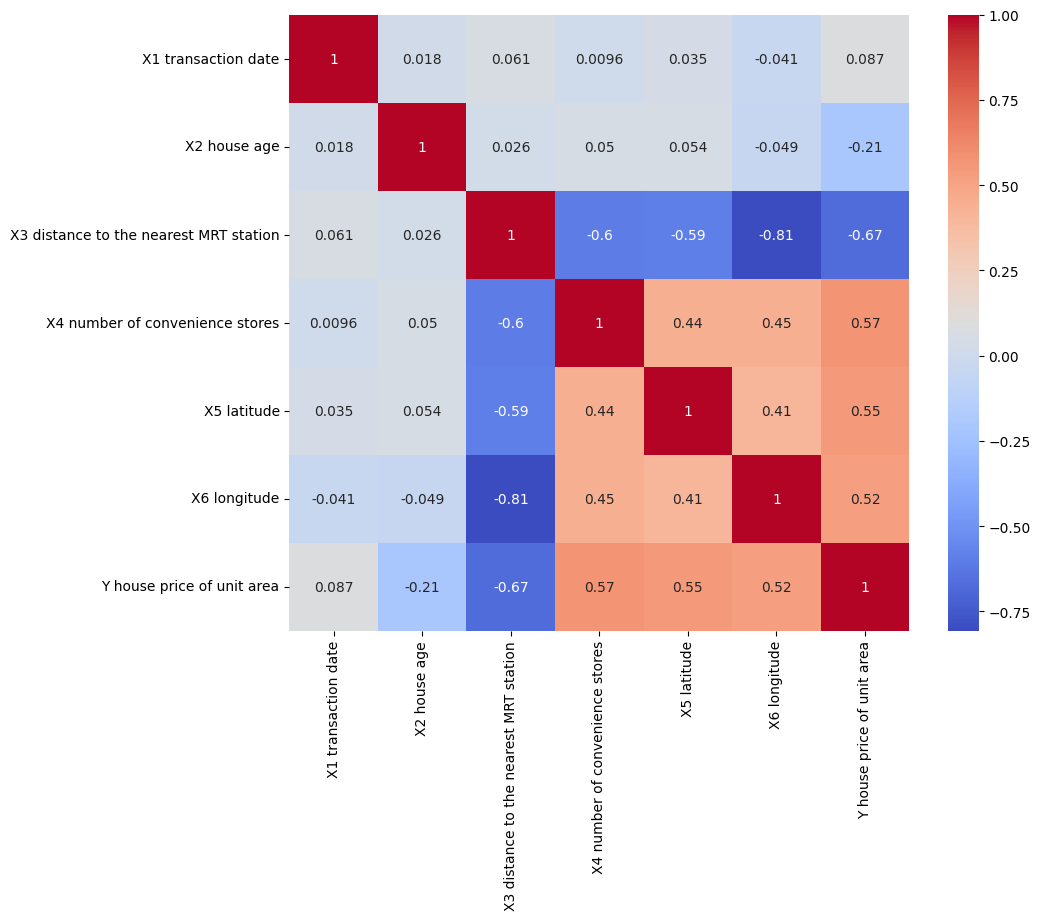

In [9]:
plt.figure(figsize=(10, 8))
corr_matrix = data_1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

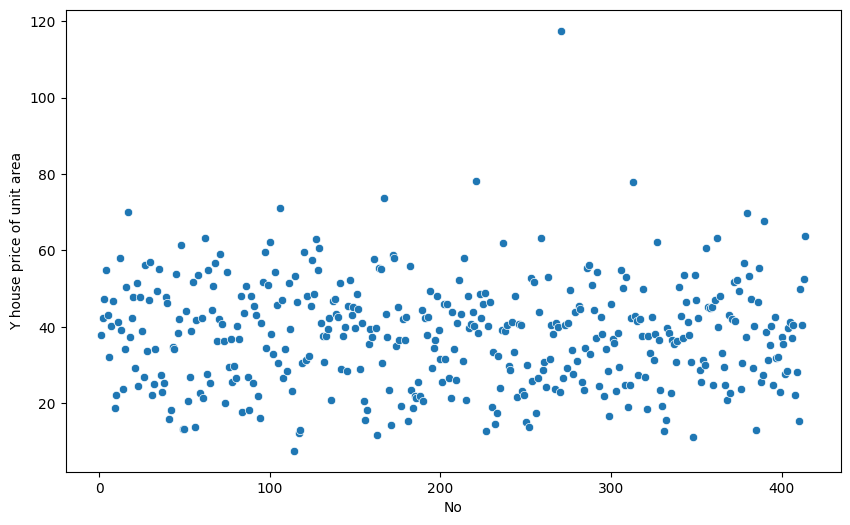

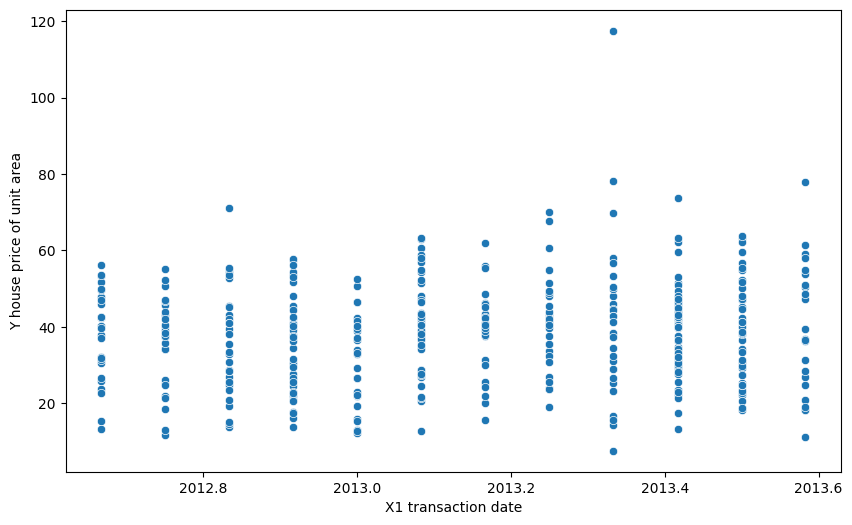

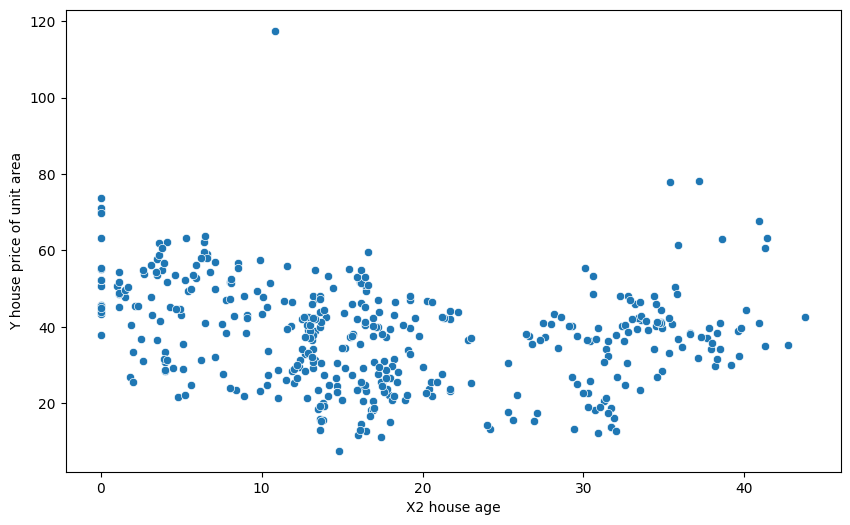

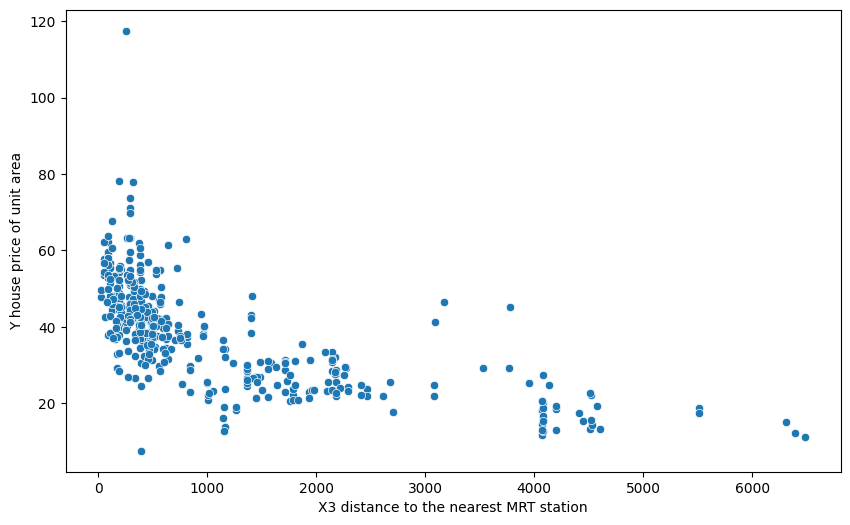

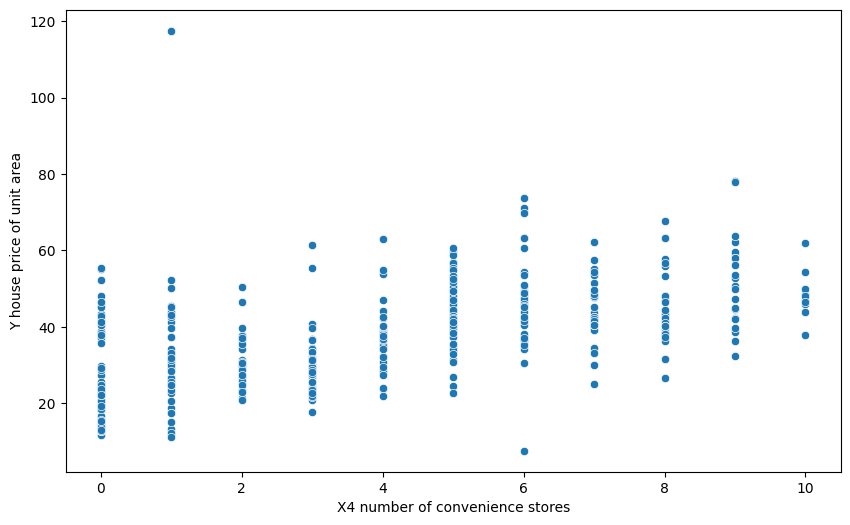

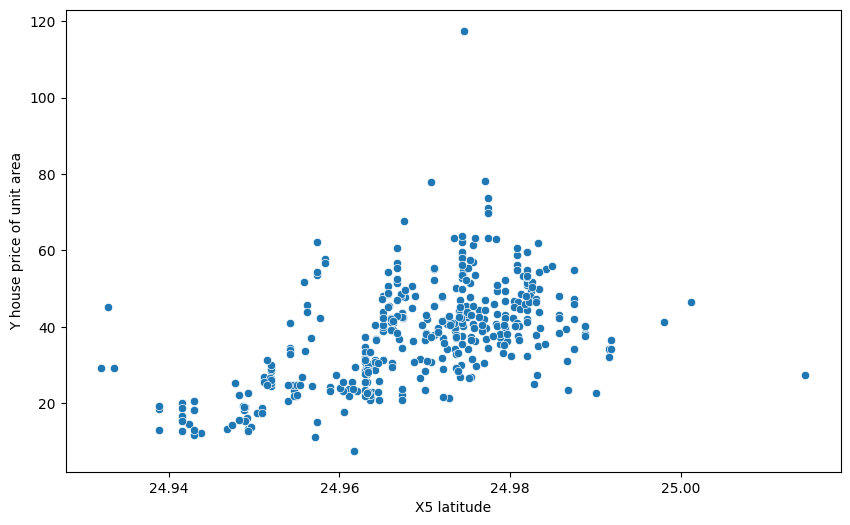

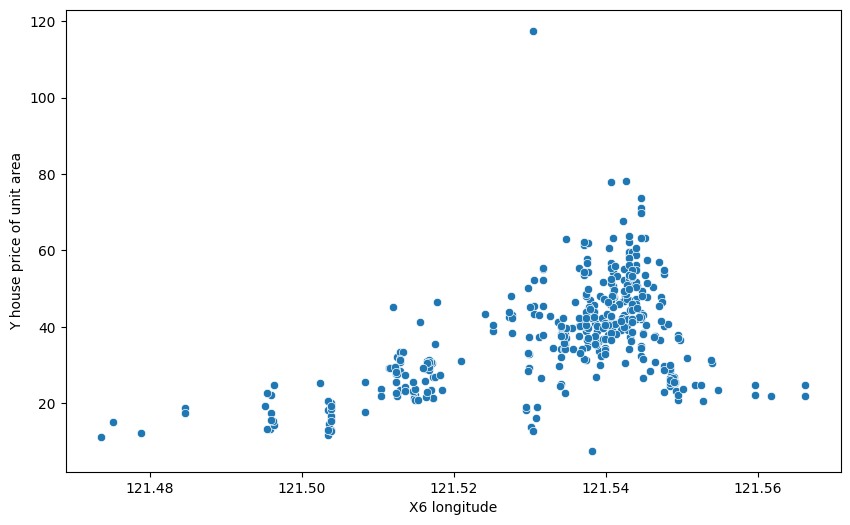

In [10]:
features = data.columns.drop('Y house price of unit area')
Y=data['Y house price of unit area']
for feature in features:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=data[feature],y=Y,)
    plt.show()

### x and y data selection

In [11]:
x=  data.drop(columns=['Y house price of unit area', 'No'])

In [12]:
print(x)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [13]:
y = data['Y house price of unit area']

In [14]:
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 69)

In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(331, 6) (83, 6) (331,) (83,)


In [17]:
feature_names= ['transaction date', 'house age', 'MRT station', 'convience store', 'latitude', 'longitude']

## linear regression

In [18]:
Linear_Reg = LinearRegression()
Linear_Reg.fit(x_train, y_train)

LinearRegression()

[ 3.99871337e+00 -2.70613981e-01 -4.42534768e-03  1.04046428e+00
  2.54325867e+02 -2.14250306e+01]


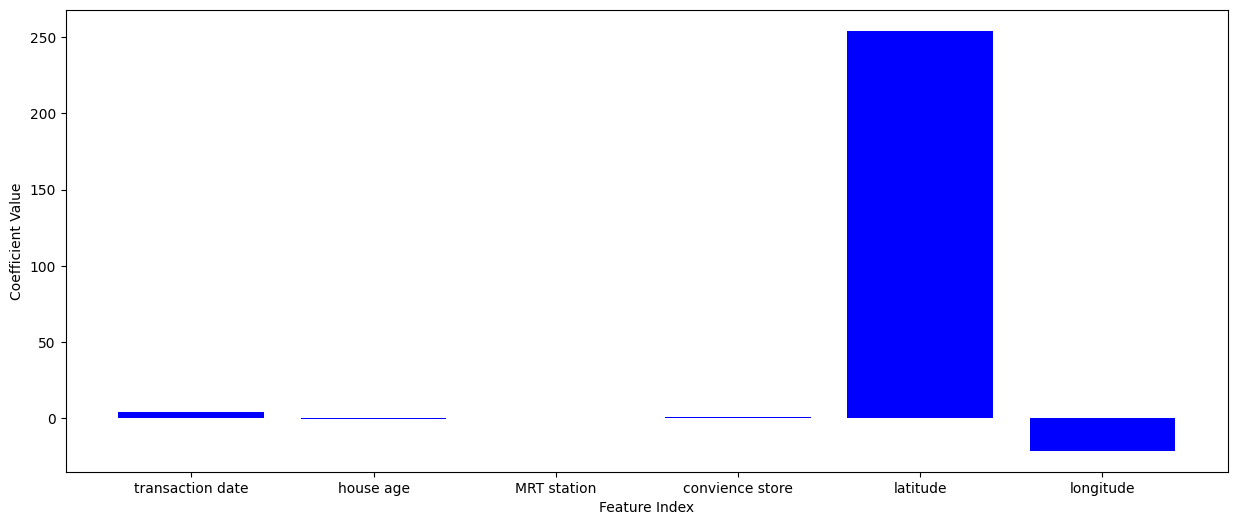

In [19]:
weights_linear = Linear_Reg.coef_
print(weights_linear)
plt.figure(figsize= (15,6))
plt.bar(feature_names, weights_linear, label= "linear regression", color= "blue")
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()

In [20]:
### positive correlation with latitude
### negitive correlation with longitude

## ridge regession 

In [21]:
ridge_reg = Ridge(alpha=2)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=2)

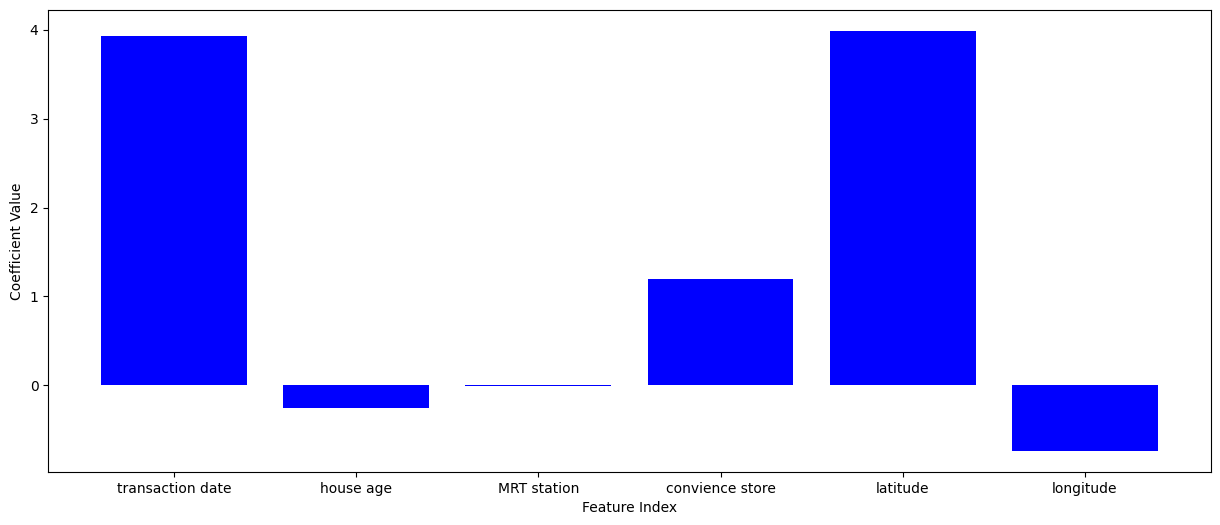

In [22]:
weights_ridge = ridge_reg.coef_

plt.figure(figsize= (15,6))
plt.bar(feature_names, weights_ridge, label= "ridge regression", color= "blue")
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()

In [23]:
### positive correlation with latitude
### negitive correlation with longitude

## lasso regression

In [24]:
lasso_Reg = Lasso(alpha=0.5)
lasso_Reg.fit(x_train, y_train)

Lasso(alpha=0.5)

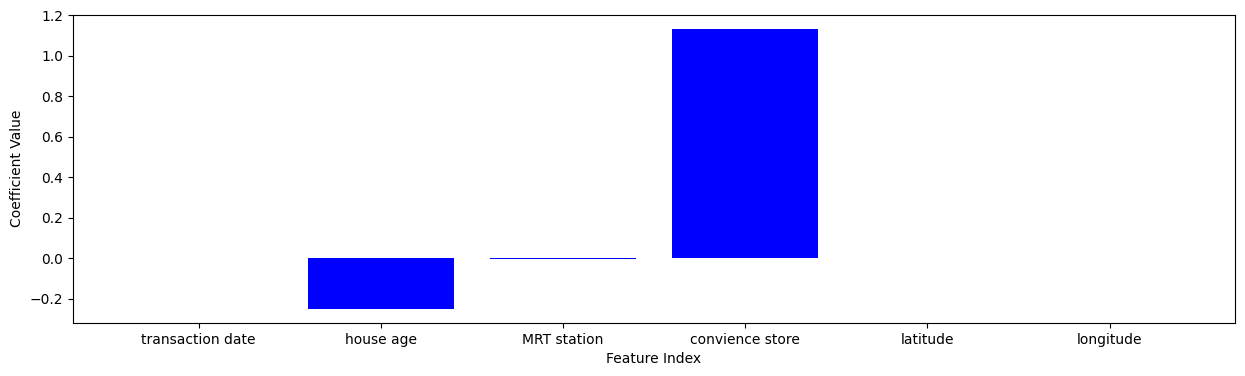

In [25]:
weights_lasso = lasso_Reg.coef_

plt.figure(figsize= (15,4))
plt.bar(feature_names, weights_lasso, label= "lasso regression", color= "blue")
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.show()

In [26]:
### positive correlation with convience store
### negitive correlation with house  age

## elastic net regression

In [27]:
elastic_Reg = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_Reg.fit(x_train, y_train)

ElasticNet()

[ 0.         -0.24635081 -0.00559312  1.03677769  0.         -0.        ]


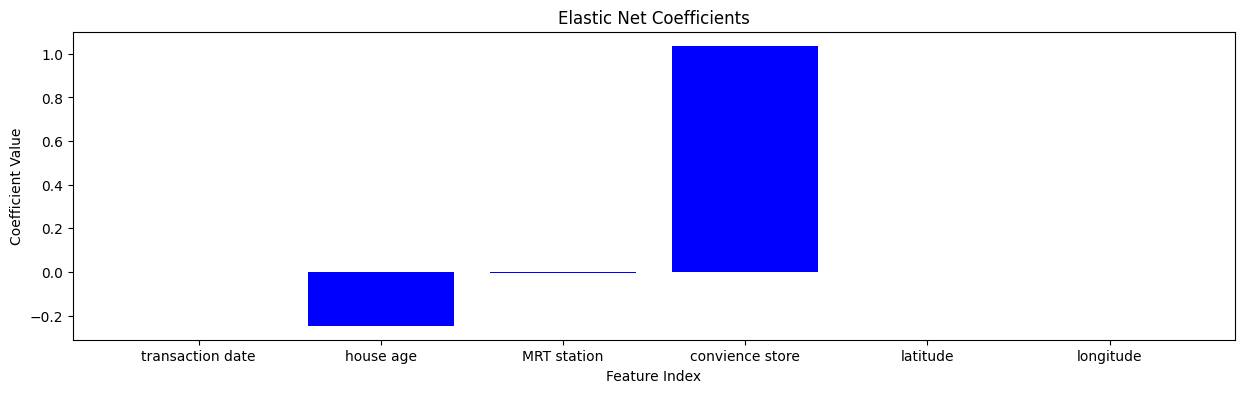

In [28]:
weights_elastic = elastic_Reg.coef_
print(weights_elastic)
plt.figure(figsize= (15,4))
plt.bar(feature_names, weights_elastic, label= "lasso regression", color= "blue")
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Elastic Net Coefficients')
plt.show()

In [29]:
### positive correlation with convience store
### negitive correlation with house age

## mean squared error

In [30]:
linear_pridict_y = Linear_Reg.predict(x_test)
mse1 = np.mean((linear_pridict_y- y_test)**2)
print("mse for linear regression: ", mse1)

mse for linear regression:  86.06496456478575


In [31]:
ridge_pridict_y = ridge_reg.predict(x_test)
mse2 = np.mean((ridge_pridict_y- y_test)**2)
print("mse for ridge regression: ", mse2)

mse for ridge regression:  86.45681171596199


In [32]:
lasso_pridict_y = lasso_Reg.predict(x_test)
mse3 = np.mean((lasso_pridict_y- y_test)**2)
print("mse for lasso regression: ", mse3)

mse for lasso regression:  93.13148725536007


In [33]:
elastic_predict_y = elastic_Reg.predict(x_test)
mse4 = np.mean((elastic_predict_y- y_test)**2)
print("mse for elastic regression: ", mse4)

mse for elastic regression:  93.69879595903981


## r squared error for all models

In [34]:
r2_linear = r2_score(y_test, linear_pridict_y)
print("r2 error in linear regreesion: ",r2_linear )

r2 error in linear regreesion:  0.563905614910749


In [35]:
r2_ridge = r2_score(y_test, ridge_pridict_y)
print("r2 error in ridge regreesion: ",r2_ridge )

r2 error in ridge regreesion:  0.5619201107824978


In [36]:
r2_lasso = r2_score(y_test, lasso_pridict_y)
print("r2 error in lasso regreesion: ",r2_lasso )

r2 error in lasso regreesion:  0.528099280904238


In [37]:
r2_elastic = r2_score(y_test, elastic_predict_y)
print("r2 error in elastic regreesion: ",r2_elastic )

r2 error in elastic regreesion:  0.5252247065459257


## comparison scatter plot for all regression models

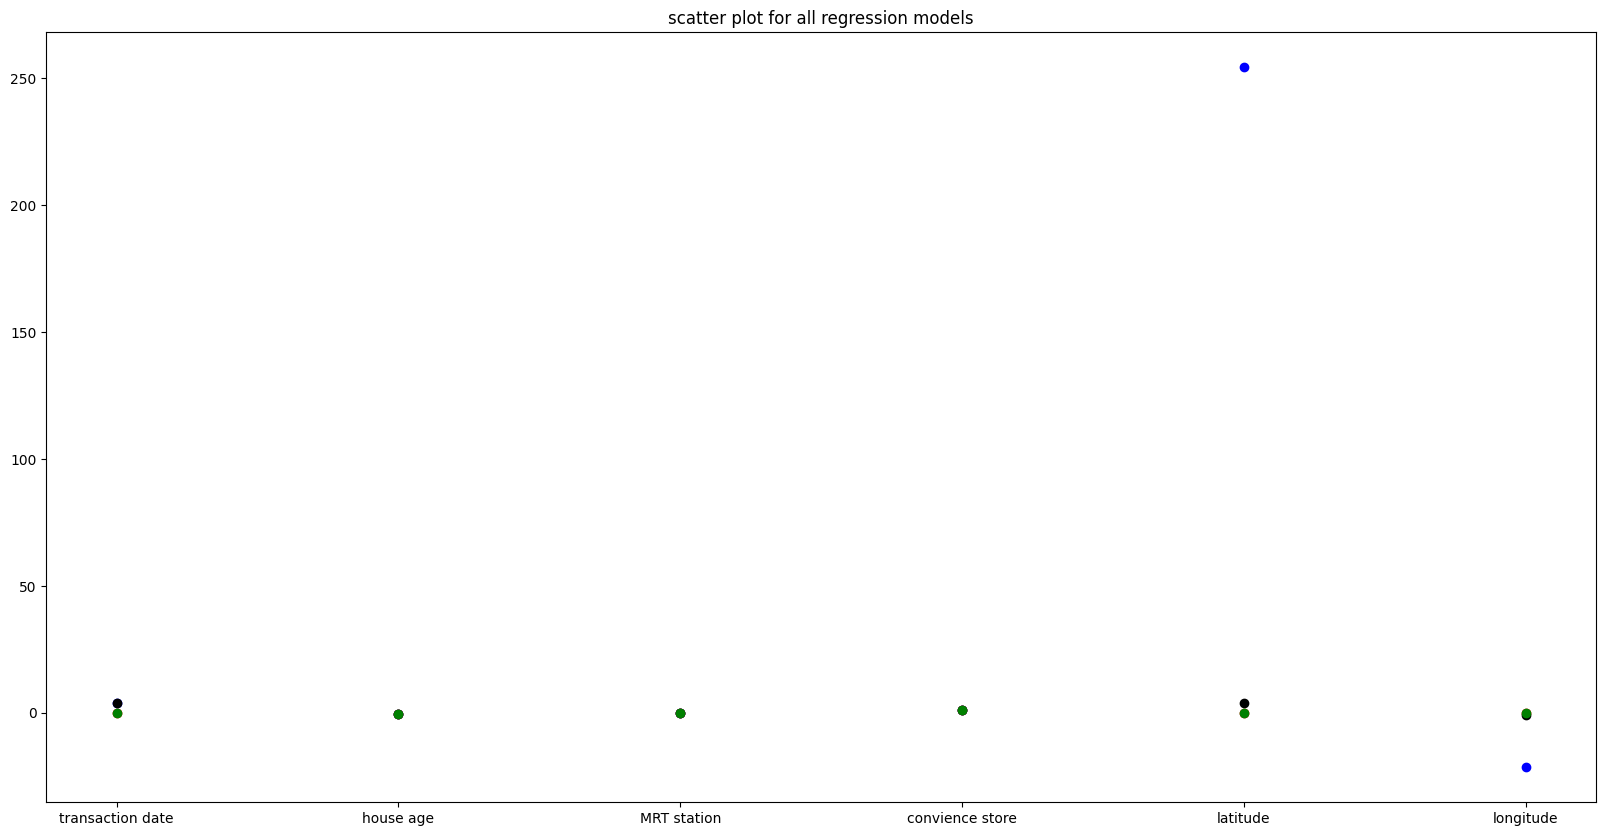

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(feature_names, weights_linear, label="linear regression", color="blue")
plt.scatter(feature_names, weights_lasso, label="ridge regression", color="red")
plt.scatter(feature_names, weights_ridge, label="lasso regression", color="black")
plt.scatter(feature_names, weights_elastic, label="elastic net regression", color="green")
plt.title('scatter plot for all regression models')
plt.show()

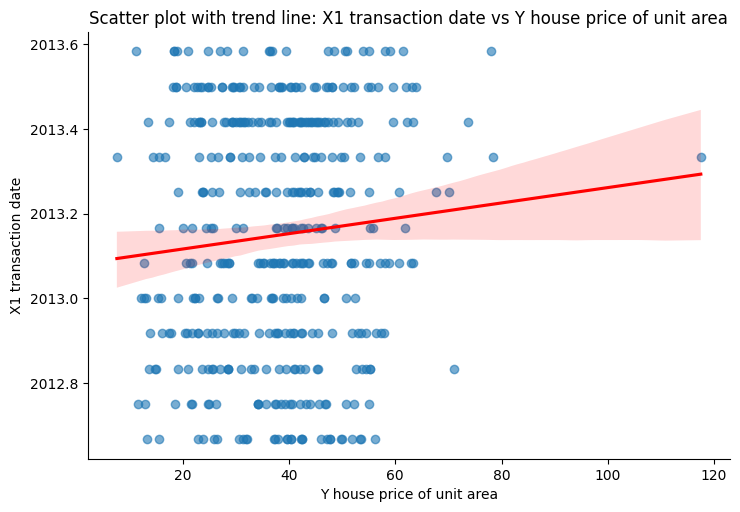

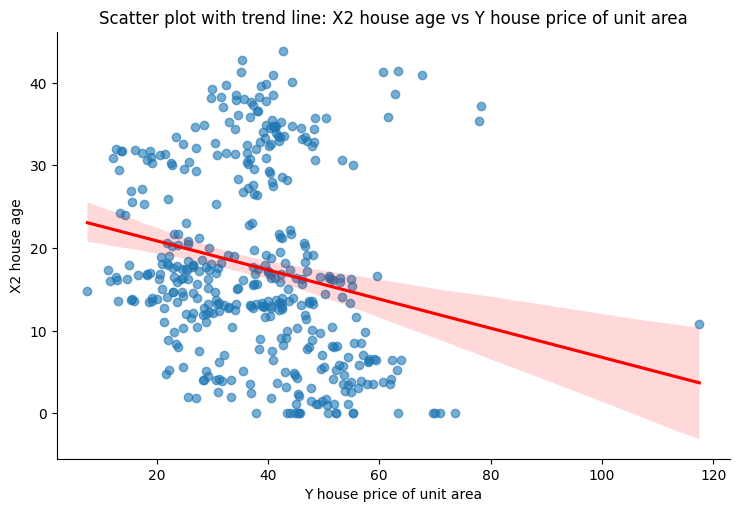

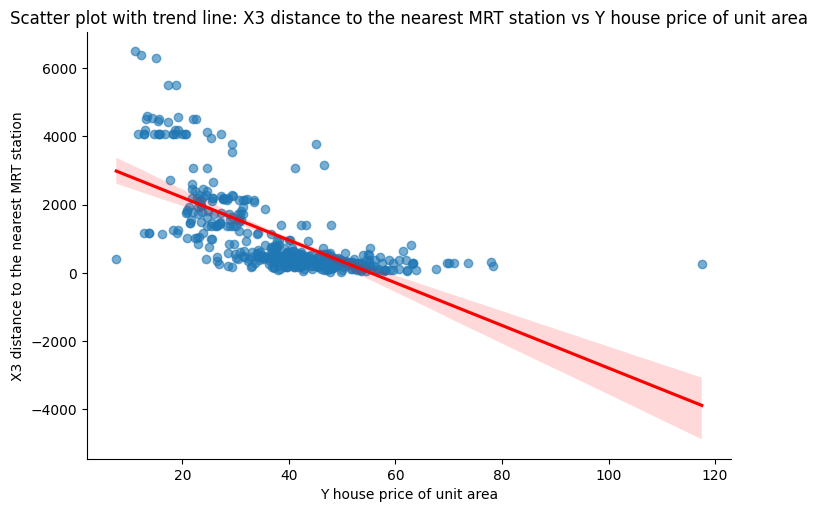

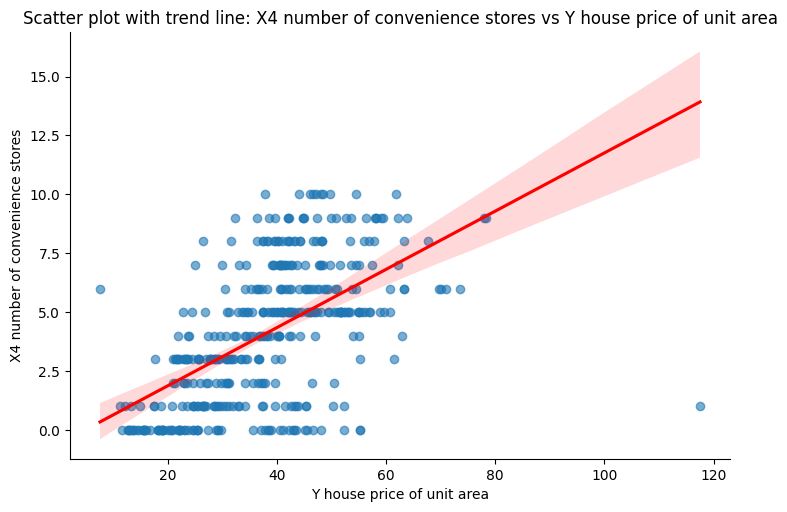

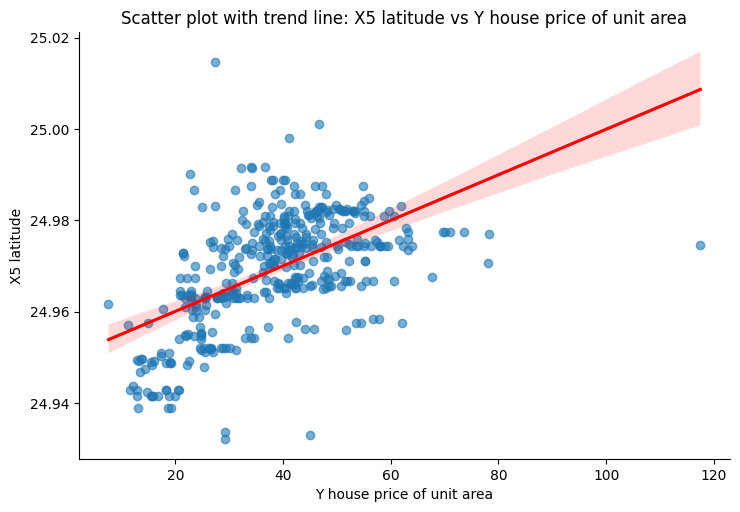

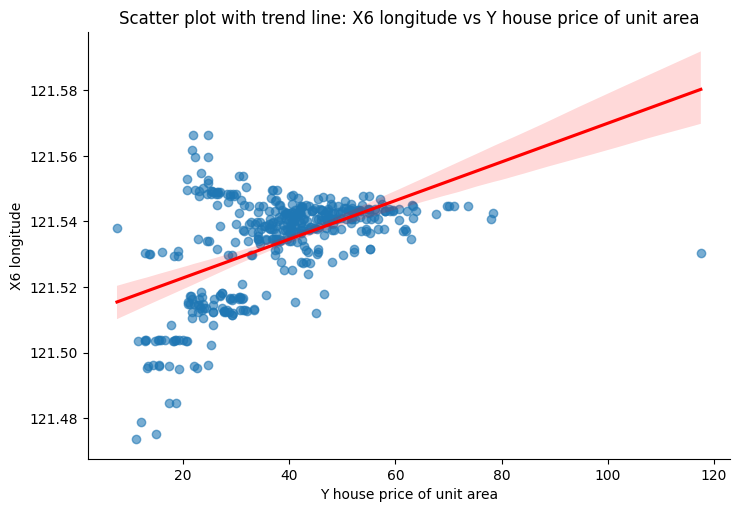

In [39]:
df = pd.DataFrame(data_1)
target = 'Y house price of unit area'
feature_names = df.columns.drop(target)

for feature in feature_names:
    sns.lmplot(x=target, y=feature, data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"}, height=5, aspect=1.5)
    plt.title(f"Scatter plot with trend line: {feature} vs {target}")
    plt.show()

## polynomial regression

In [40]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train, y_train)


LinearRegression()

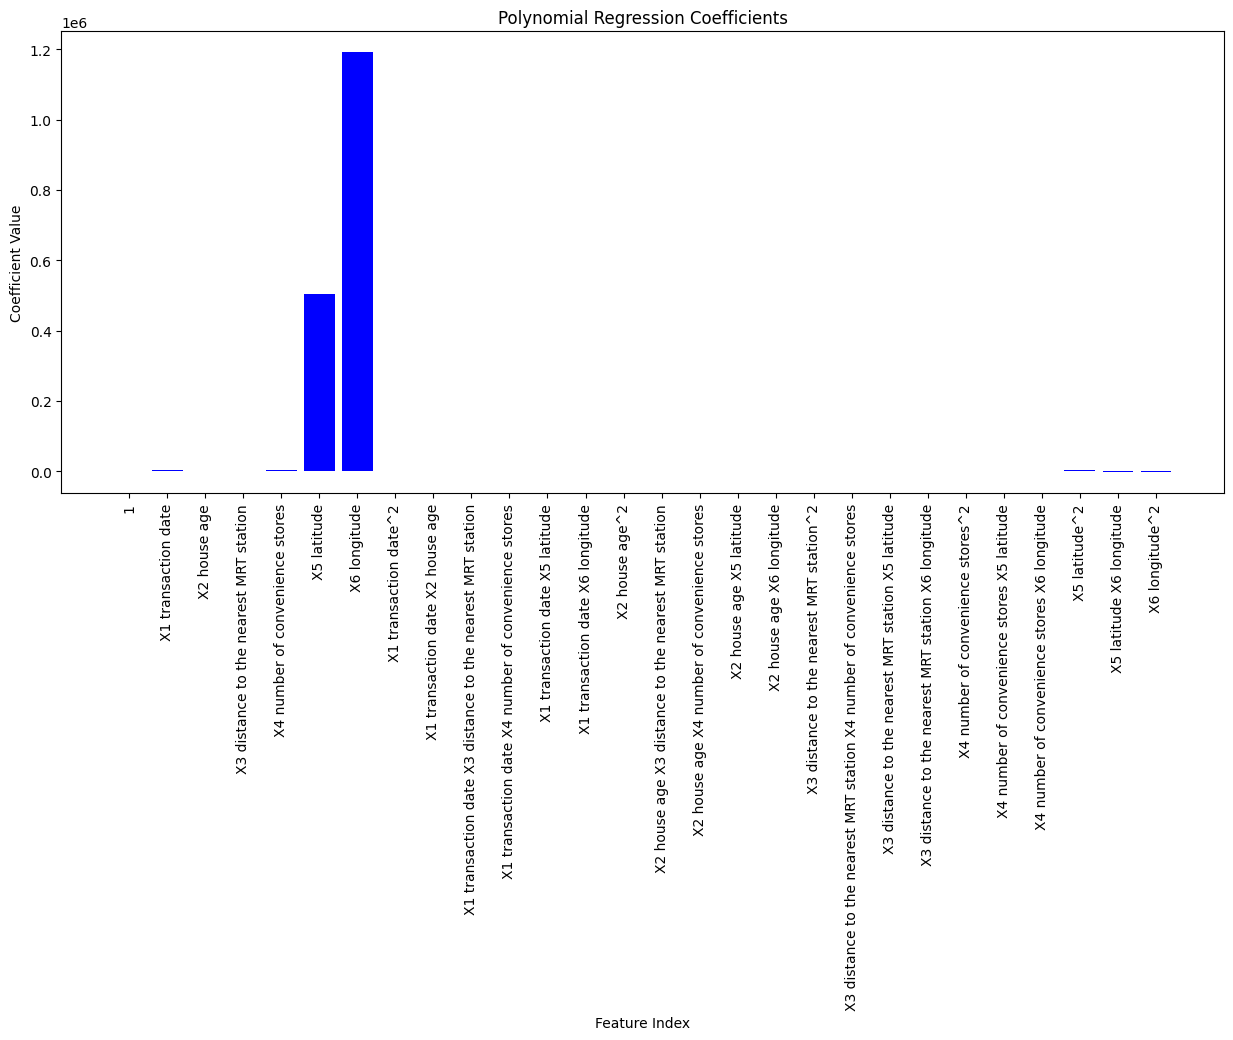

In [41]:
#getting features names
weights_poly = poly_reg.coef_
poly_feature_names = poly_features.get_feature_names_out(input_features=feature_names)

#ploting the barplot for all features of polynomial regression
plt.figure(figsize=(15, 6))
plt.bar(range(len(weights_poly)), weights_poly, label="polynomial regression", color="blue")
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Polynomial Regression Coefficients')
plt.xticks(ticks=range(len(weights_poly)), labels=poly_feature_names, rotation=90)
plt.show()

## errors in polynomial regression

In [42]:
y_pred = poly_reg.predict(x_poly_test)
mse_polynomial = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse",mse_polynomial)
print("r2", r2)

mse 61.36388415670729
r2 0.6890669105212579


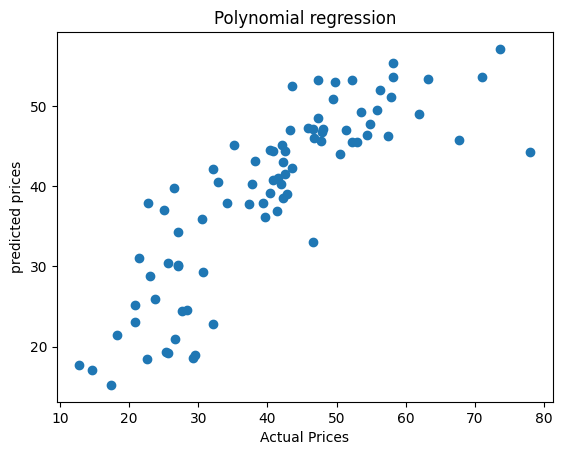

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('predicted prices')
plt.title('Polynomial regression')
plt.show()


## comparing alll models

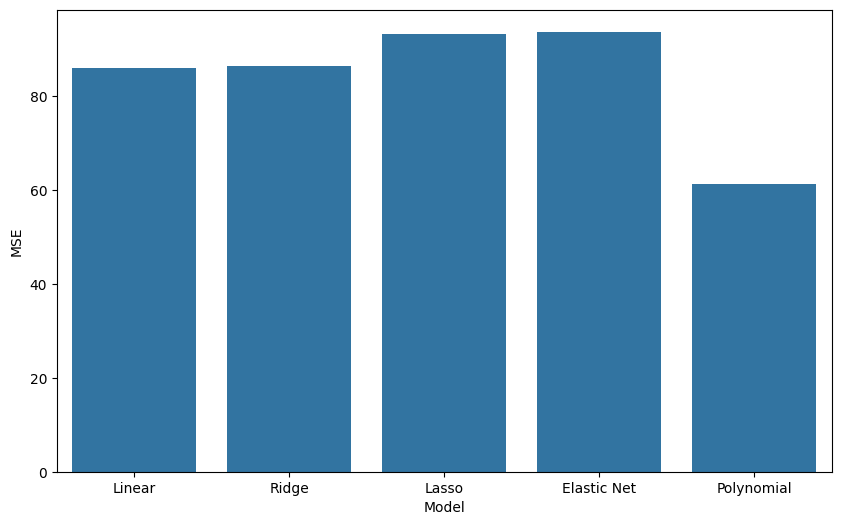

In [44]:
mse_values = [mse1, mse2, mse3, mse4, mse_polynomial]
models = ['Linear', 'Ridge', 'Lasso', 'Elastic Net', 'Polynomial']
df_mse = pd.DataFrame({'Model': models, 'MSE': mse_values})
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='MSE',data=df_mse)
plt.show()

# polynomial is the best model as its mean square error is the least

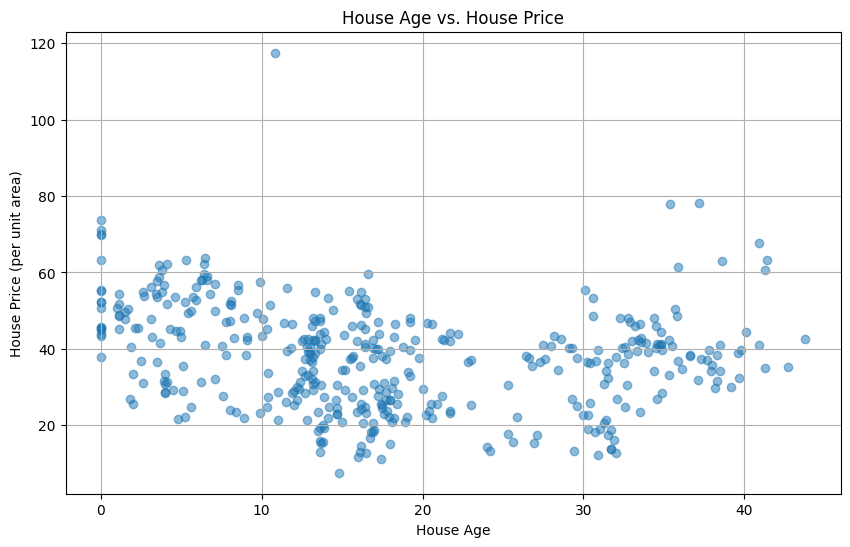

In [45]:
import matplotlib.pyplot as plt

# Scatter plot for House Age vs. House Price
plt.figure(figsize=(10, 6))
plt.scatter(data['X2 house age'], data['Y house price of unit area'], alpha=0.5)
plt.title('House Age vs. House Price')
plt.xlabel('House Age')
plt.ylabel('House Price (per unit area)')
plt.grid(True)
plt.show()


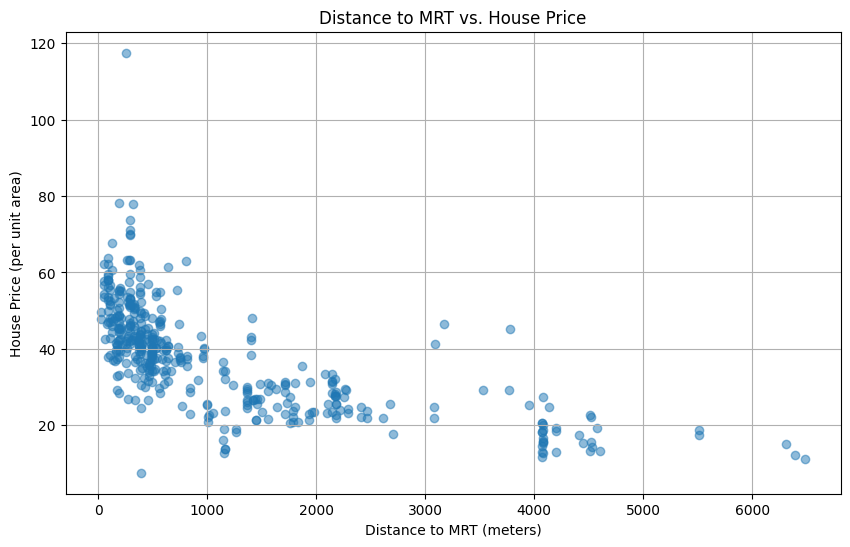

In [46]:
# Scatter plot for Distance to MRT vs. House Price
plt.figure(figsize=(10, 6))
plt.scatter(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'], alpha=0.5)
plt.title('Distance to MRT vs. House Price')
plt.xlabel('Distance to MRT (meters)')
plt.ylabel('House Price (per unit area)')
plt.grid(True)
plt.show()


In [47]:
# Summary statistics table
summary_statistics = data.describe()
print(summary_statistics)


               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [48]:
# Calculating Mean Squared Error and R-squared for different regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined and split

# Linear Regression
linear_reg = LinearRegression().fit(x_train, y_train)
linear_pred = linear_reg.predict(x_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Ridge Regression
ridge_reg = Ridge(alpha=2).fit(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso_reg = Lasso(alpha=0.5).fit(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# ElasticNet Regression
elastic_reg = ElasticNet().fit(x_train, y_train)
elastic_pred = elastic_reg.predict(x_test)
elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_r2 = r2_score(y_test, elastic_pred)

# Printing results
print(f"Linear Regression MSE: {linear_mse}, R2: {linear_r2}")
print(f"Ridge Regression MSE: {ridge_mse}, R2: {ridge_r2}")
print(f"Lasso Regression MSE: {lasso_mse}, R2: {lasso_r2}")
print(f"ElasticNet Regression MSE: {elastic_mse}, R2: {elastic_r2}")


Linear Regression MSE: 86.06496456478575, R2: 0.563905614910749
Ridge Regression MSE: 86.45681171596199, R2: 0.5619201107824978
Lasso Regression MSE: 93.13148725536007, R2: 0.528099280904238
ElasticNet Regression MSE: 93.69879595903981, R2: 0.5252247065459257
